In [203]:
import dlib
import cv2
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# create list for landmarks
ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))

# create face detector, predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [204]:
#이미지 불러오기 && 랜드마크 추출
def readImage(imageName) :
    #read image
    image = cv2.imread(imageName) 
    image = cv2.resize(image,(864,1152))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(image)
    #extract landmark
    face = detector(image, 1)[0]
    landmarks = predictor(image, face)
    points = landmarks.parts()
    return image, points

In [205]:
def calAngle(points) :
    midx = (points[39].x + points[42].x) / 2
    midy = (points[39].y + points[42].y) / 2
    midx = midx - points[33].x
    midy = midy - points[33].y
    #xLinex = 1
    #xLiney = 0
    # return acos(a.dot(b) / (a.norm()*b.norm()));
    return (90-math.acos(midx*1 / math.sqrt(midx*midx + midy*midy))*180/math.pi)

In [206]:
#origin 점을 기준으로 angle각도 만큼 좌표회전
def rotate(origin, point, angle):
    angle = angle * -1
    ox, oy = origin
    px, py = point
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [207]:
#이미지 및 랜드마크 회전
def rotateImage(image, points, angle) :
    #이미지 회전
    h,w = image.shape[:2]
    rotatedImage = np.copy(image)
    m1 = cv2.getRotationMatrix2D((w/2,h/2), angle,1)
    rotatedImage = cv2.warpAffine(image,m1,(w,h))
    
    #랜드마크 회전
    for p in points :
        p.x, p.y = list(map(int, rotate((w/2,h/2),(p.x,p.y),math.radians(angle))))
    return rotatedImage, points

In [208]:
#이미지 자르기 && 랜드마크도 이동시켜줌
def cutImage(image, points) : 
    ##########중간점 찾기##########
    centerPoint = points[29]
    dx = math.ceil((points[16].x - points[0].x)/2)
    dy = math.ceil((points[8].y - points[19].y)/2)
    ##############자르기#############
    image = image[points[29].y-dy:points[29].y+dy+1,points[33].x-dx:points[33].x+dx+1]

    return image, dx

In [209]:
#이미지 출력
def printImage(image, points) :
    for p in points :
        cv2.circle(image, (p.x, p.y), 2, (0, 255, 0), -1)
    plt.imshow(image, cmap='gray')

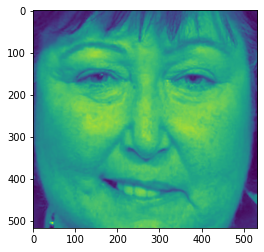

In [210]:
image, points = readImage("0 (19).jpg") #이미지 읽어 오기
Landmarks = points # C++ 연산에서 사용할 랜드마크
angle = calAngle(points) # 회전해야할 각도 계산
image, points = rotateImage(image,points, angle) #이미지 회전
image, dx = cutImage(image, points) #이미지 자르기
plt.imshow(image)

In [211]:
%matplotlib inline
import numpy as np
from skimage import io, filters
from skimage.color import rgb2gray
from scipy import ndimage as nd

In [212]:
image = filters.gaussian(image, sigma=1.5)
gray_image = rgb2gray(image)
grad_x = nd.convolve(gray_image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])) 
grad_y = nd.convolve(gray_image, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))
mag = np.sqrt(np.power(grad_x,2)+np.power(grad_y,2))
theta = np.arctan2(np.power(grad_y,2), np.power(grad_x,2))

In [214]:
y_size = image.shape[0]
x_size = image.shape[1]
cnt = y_size * x_size / 2

In [217]:
DD = 0
for y in range(0,y_size) : 
    for x in range(0,dx) : 
        DD = DD + abs(mag[y][x] - mag[y][x_size-1-x])
DD = DD / cnt
     
EOS = 0
for y in range(0,y_size) : 
    for x in range(0,dx) :
        EOS = EOS + abs(theta[y][x] - theta[y][x_size-1-x])
EOS = math.cos(EOS / cnt)
X = [DD,EOS]
print(X)

[0.044153837854207435, 0.8339438754744997]


In [220]:
df = pd.DataFrame(X)
X = np.array(df).T

In [29]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from numpy import argmax
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

In [221]:
LoadModel = load_model('DDEOSMODEL.h5')

NameError: name 'load_model' is not defined

In [222]:
a = LoadModel.predict(X)

NameError: name 'LoadModel' is not defined